In [ ]:
!pip install imblearn # install the missing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE # now this import will work
data = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [ ]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
for index, row in data.iterrows():
  for i in data.columns:
    if pd.isnull(row[i]):
      data.dropna(axis=0, inplace=True)

In [ ]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


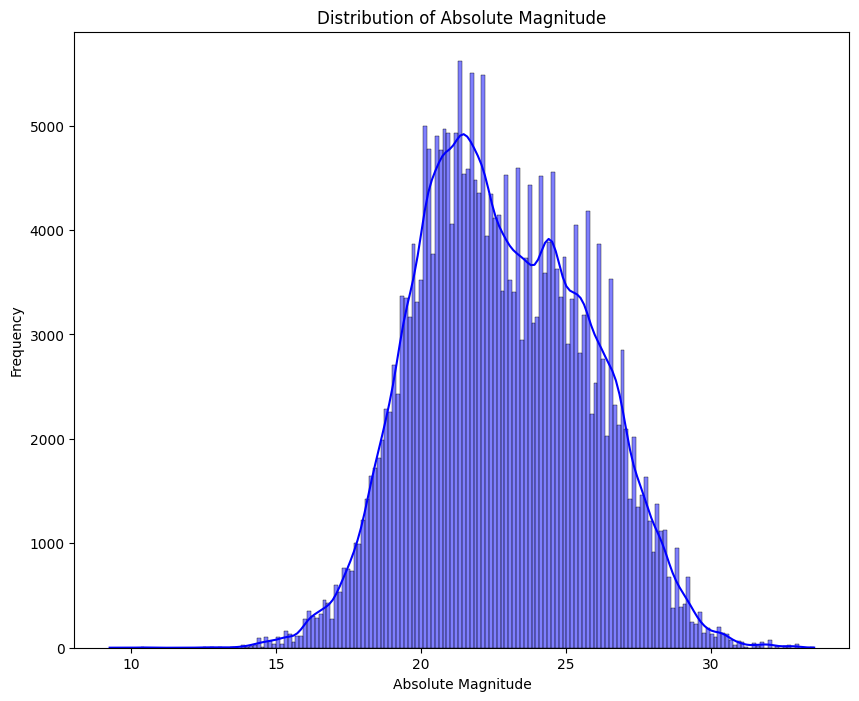

In [ ]:
# Plotting the distribution of 'absolute_magnitude'
plt.figure(figsize=(10,8))
sns.histplot(data_cleaned['absolute_magnitude'], kde=True, color='blue')
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()


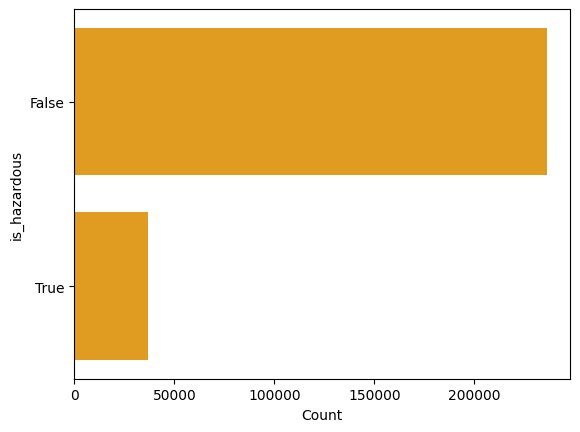

In [ ]:
is_hazardous_counts = data_cleaned['is_hazardous'].value_counts()
sns.countplot(y='is_hazardous', data=data_cleaned , color= 'orange')
plt.xlabel('Count')
plt.show()

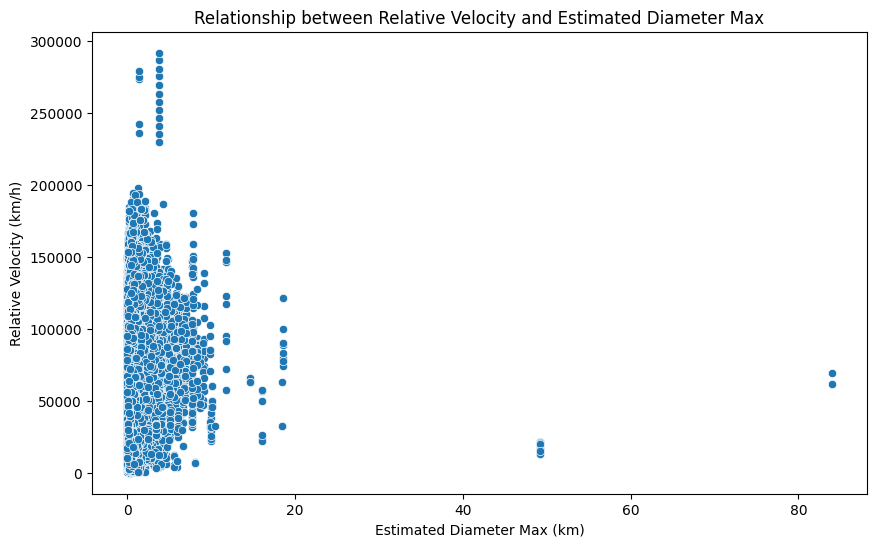

Correlation coefficient: 0.2164125146002318


In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_diameter_max', y='relative_velocity', data=data_cleaned)
plt.title('Relationship between Relative Velocity and Estimated Diameter Max')
plt.ylabel('Relative Velocity (km/h)')
plt.xlabel('Estimated Diameter Max (km)')
plt.show()

# Calculate the correlation coefficient
correlation = data_cleaned['relative_velocity'].corr(data_cleaned['estimated_diameter_max'])
print("Correlation coefficient:", correlation)

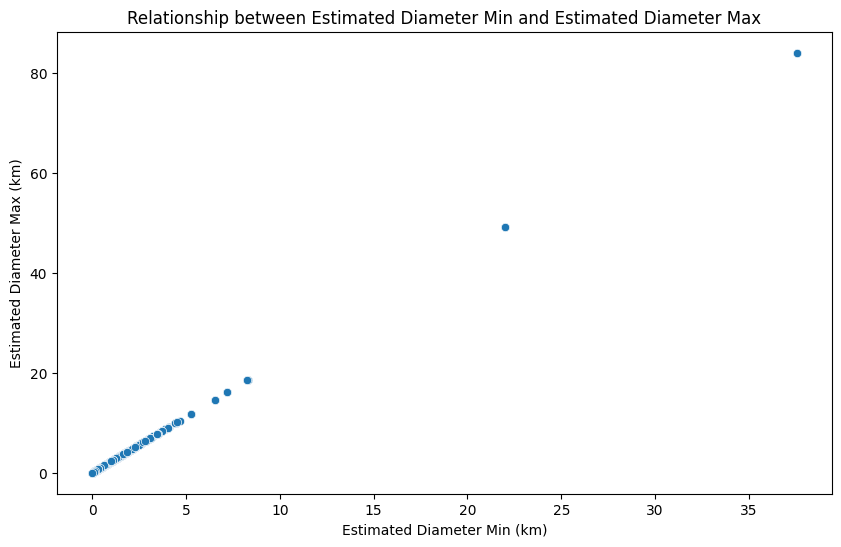

Correlation coefficient: 1.0


In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_diameter_min', y='estimated_diameter_max', data=data_cleaned)
plt.title('Relationship between Estimated Diameter Min and Estimated Diameter Max')
plt.xlabel('Estimated Diameter Min (km)')
plt.ylabel('Estimated Diameter Max (km)')
plt.show()

# Calculate the correlation coefficient
correlation = data_cleaned['estimated_diameter_min'].corr(data_cleaned['estimated_diameter_max'])
print("Correlation coefficient:", correlation)

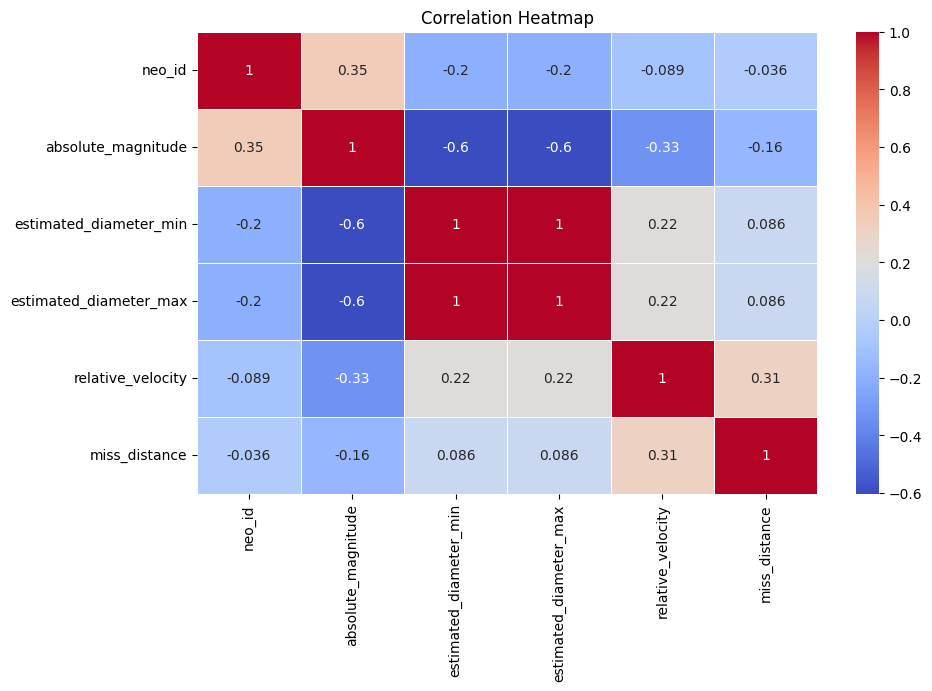

In [ ]:
# Select only numeric columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


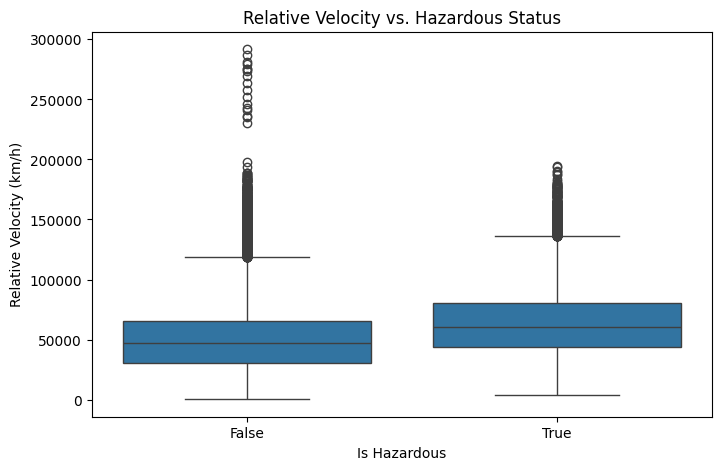

In [ ]:
# Boxplot to compare relative velocity between hazardous and non-hazardous NEOs
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_hazardous', y='relative_velocity', data=data_cleaned)
plt.title('Relative Velocity vs. Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Relative Velocity (km/h)')
plt.show()


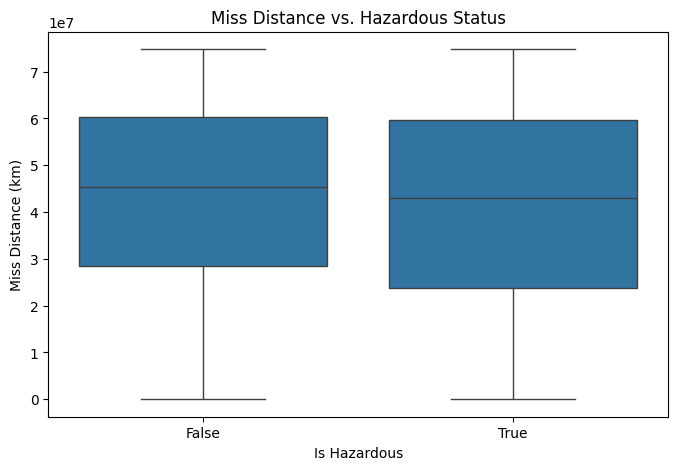

In [ ]:
# Boxplot to compare miss distance between hazardous and non-hazardous NEOs
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_hazardous', y='miss_distance', data=data_cleaned)
plt.title('Miss Distance vs. Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Miss Distance (km)')
plt.show()

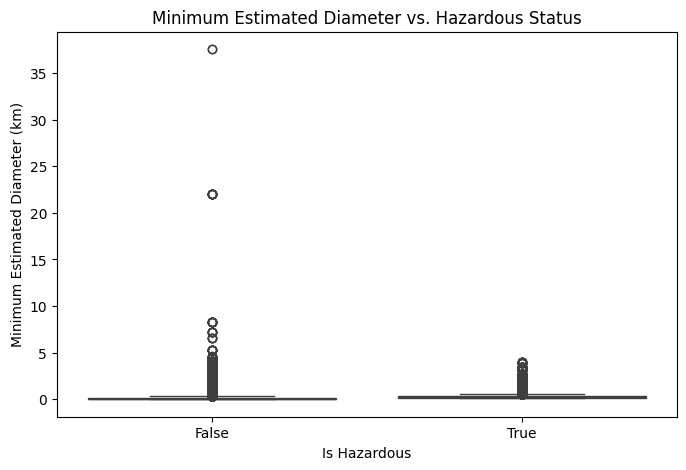

In [ ]:
# Boxplot to compare minimum estimated diameter between hazardous and non-hazardous NEOs
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_hazardous', y='estimated_diameter_min', data=data_cleaned)
plt.title('Minimum Estimated Diameter vs. Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Minimum Estimated Diameter (km)')
plt.show()

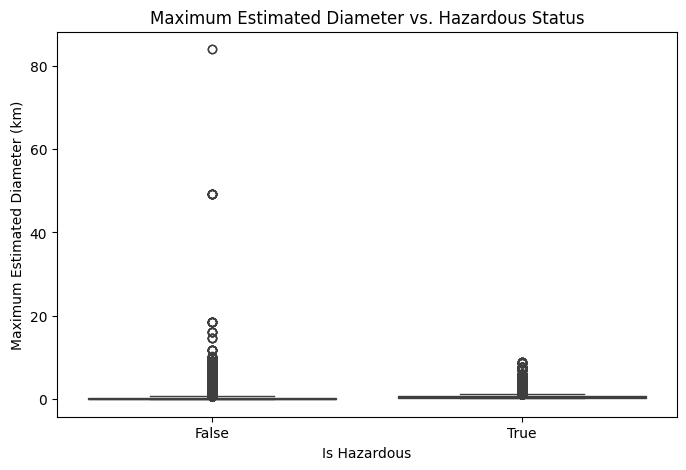

In [ ]:
# Boxplot to compare minimum estimated diameter between hazardous and non-hazardous NEOs
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_hazardous', y='estimated_diameter_max', data=data_cleaned)
plt.title('Maximum Estimated Diameter vs. Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Maximum Estimated Diameter (km)')
plt.show()

In [ ]:
# Define features and target variable
X = data.drop(columns=['neo_id', 'name', 'is_hazardous', 'orbiting_body']) # Drop the 'orbiting_body' column
y = data['is_hazardous']

# Drop rows with NaN values in either X or y
X = X.dropna()
y = y[X.index] # Ensure y aligns with the dropped rows in X

# Convert boolean values in 'y' to integers (0 and 1)
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ***Training the model***

In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled) # Use X_train_scaled and y_train_resampled

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     59002
           1       0.67      0.66      0.66      8633

    accuracy                           0.92     67635
   macro avg       0.81      0.81      0.81     67635
weighted avg       0.91      0.92      0.91     67635

[[56201  2801]
 [ 2945  5688]]
0.8056970853546291


In [ ]:
model.score(X_test_scaled, y_test)

0.9150439861018703

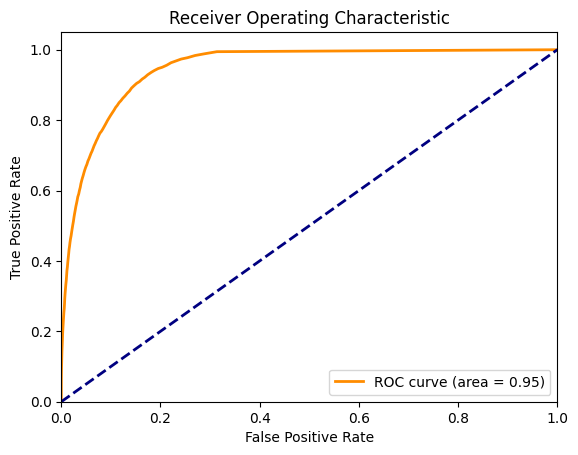

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()